Coadds of archival STIS data.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [35]:
path = '/home/david/work/muscles/trappist-1/hst/archival_data/'

In [36]:
x1ds = os.listdir(path)

In [38]:
G140M = []
G140L = []
for s in x1ds:
    if fits.getheader(path+s,0)['OPT_ELEM'] =='G140M':
        G140M.append(s)
    else:
        G140L.append(s)
    

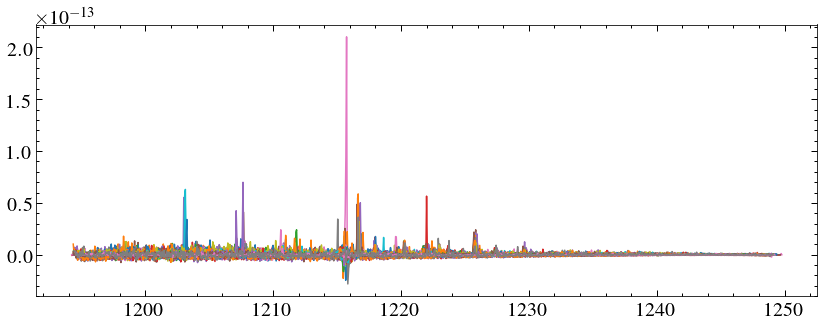

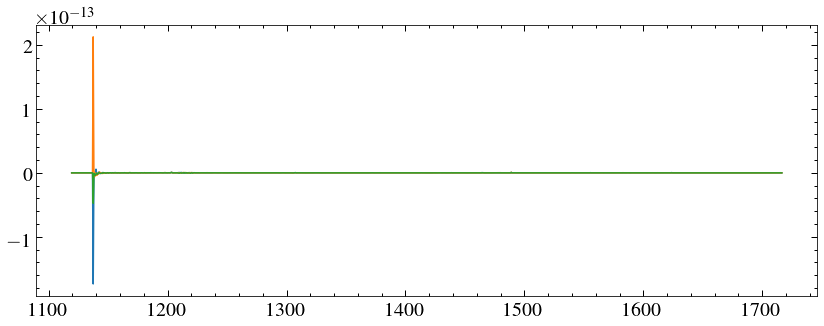

In [39]:
for s in G140M:
    data = fits.getdata(path+s,1)[0] 
    plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.show()
for s in G140L:
    data = fits.getdata(path+s,1)[0] 
    plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.show()

In [58]:
def spectra_adder(fluxes, errors):
    """
    combines the flux at each overlap
    """
    if len(fluxes) > 1:
        for errsi in errors:
            errs = errsi
            for i in range(len(errs)):
                if errs[i] == 0:
                    if i > 5 and i < len(errs)-5:
                        errs[i] = np.median(errsi[i-5:i+5])
                    elif i < 5 and i < len(errs)-5:
                        errs[i] = np.median(errsi[i:i+10])
                    elif i > len(errs)-5 and i > 5:
                        errs[i] = np.median(errsi[i-10:i])
            errsi = errs
        wt = 1/abs(errors)
        weight_f = np.average(fluxes, axis =0, weights=wt)
        weight_e = np.average((weight_f - fluxes)**2, axis=0, weights = wt)**0.5
    else:
        weight_f, weight_e = fluxes, errors
    return weight_f, weight_e
            
            
           
            

In [59]:
#one at a time
w = []
fs = []
es = []
dqs = []
for s in G140M:
    data = fits.getdata(path+s,1)[0]
    w1, f1, e1, dq1 = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    #for i in range(len(f1)):
     #   if dq[i] != 0:
      #      f1[i], e1[i] = 0., 0.
    w = w1
    fs.append(f1)
    es.append(e1)
    dqs.append(dq1)
   # print(np.median(f1))
w = np.array(w)
fs = np.array(fs)
es = np.array(es)
dqs = np.array(dqs)
dq = np.amax(dqs, axis=0 )
f, e = spectra_adder(fs, es)

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


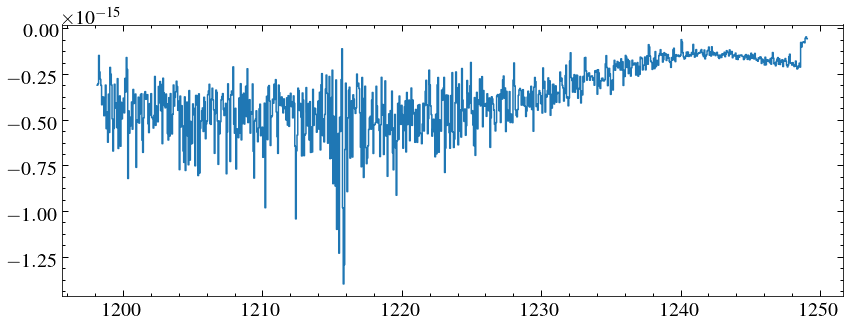

In [61]:
plt.step(w,f)
#plt.xlim(1210, 1220)

In [9]:
data = Table([w*u.AA, f*u.erg/u.cm**2/u.s/u.AA, e*u.erg/u.cm**2/u.s/u.AA, dq], names = ['WAVELENGTH', 'FLUX', 'ERROR','DQ'] )
ascii.write(data, 'TRAPPIST-1_G140M_coadd.ecsv', delimiter=',', format='ecsv', overwrite=True)

Rinse and repeat for G140L.

In [45]:
#one at a time
w = []
fs= []
es = []
dqs = []
for s in G140L:
    data = fits.getdata(path+s,1)[0]
    w1, f1, e1, dq1 = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    #for i in range(len(f1)):
     #   if dq[i] != 0:
      #      f1[i], e1[i] = 0., 0.
    w = w1
    fs.append(f1)
    es.append(e1)
    dqs.append(dq1)
w = np.array(w)
fs = np.array(fs)
es = np.array(es)
dqs = np.array(dqs)
dq = np.amax(dqs, axis=0 )
f, e = spectra_adder(fs, es)

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


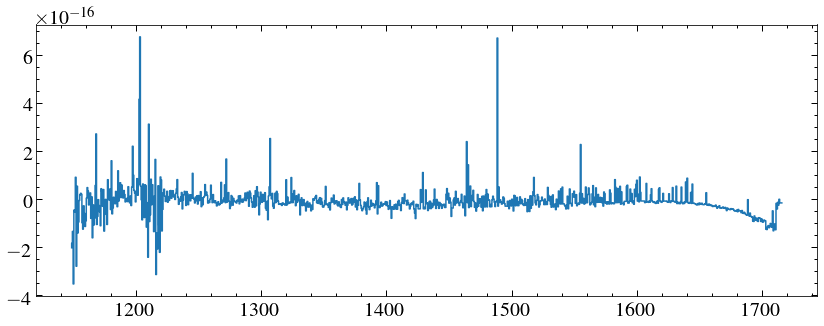

In [48]:
plt.step(w[50:-1],f[50:-1])

In [49]:
data = Table([w*u.AA, f*u.erg/u.cm**2/u.s/u.AA, e*u.erg/u.cm**2/u.s/u.AA, dq], names = ['WAVELENGTH', 'FLUX', 'ERROR','DQ'] )
ascii.write(data, 'TRAPPIST-1_G140L_coadd.ecsv', delimiter=',', format='ecsv')

Looking more at G140M from now on.

In [62]:
#one at a time
w = []
fs = []
es = []
dqs = []
for s in G140M:
    data = fits.getdata(path+s,1)[0]
    w1, f1, e1, dq1 = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    #for i in range(len(f1)):
     #   if dq[i] != 0:
      #      f1[i], e1[i] = 0., 0.
    w = w1
    fs.append(f1)
    es.append(e1)
    dqs.append(dq1)
   # print(np.median(f1))
w = np.array(w)
fs = np.array(fs)
es = np.array(es)
dqs = np.array(dqs)
dq = np.amax(dqs, axis=0 )

In [72]:
f_mean = np.mean(fs, axis=0)
e_mean = np.std(fs, axis=0)

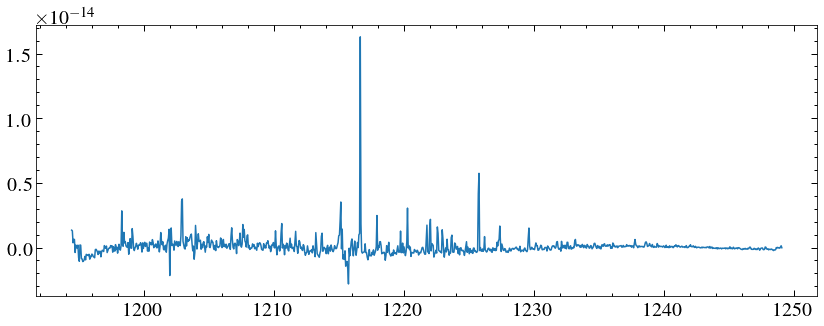

In [64]:
plt.plot(w, f_mean)

Ok, so it's the weights that are the problem?

In [65]:
f_av = np.average(fs, axis =0, weights=1/es)

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


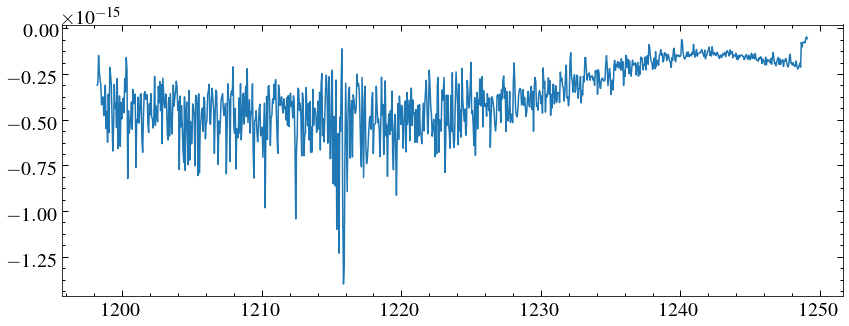

In [66]:
plt.plot(w,f_av)

Yes.

<ErrorbarContainer object of 3 artists>

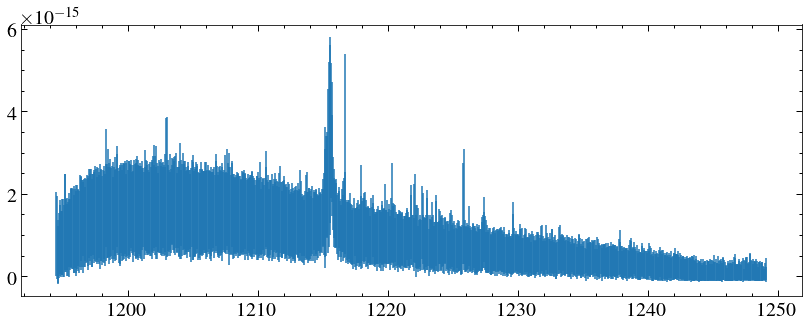

In [67]:
plt.errorbar(w, np.mean(es, axis=0), yerr=np.std(es, axis=0), ls='none')

In [68]:
f_median = np.median(fs, axis=0)

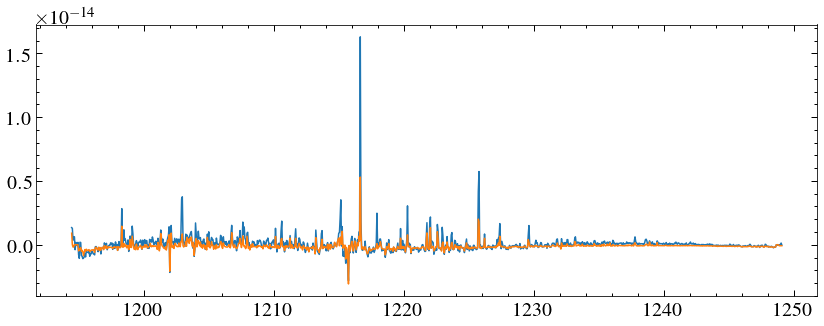

In [71]:
plt.plot(w, f_mean)
plt.plot(w, f_median)

In [73]:
data = Table([w*u.AA, f_mean*u.erg/u.cm**2/u.s/u.AA, e_mean*u.erg/u.cm**2/u.s/u.AA, dq], names = ['WAVELENGTH', 'FLUX', 'ERROR','DQ'] )
ascii.write(data, 'TRAPPIST-1_G140M_mean.ecsv', delimiter=',', format='ecsv')

In [74]:
G140L

['odek01020_x1d.fits', 'odek01030_x1d.fits', 'odek01010_x1d.fits']

Oh hey, I forgot we had our own G140L spectra...

In [75]:
w[0], w[-1]

(1194.444823387054, 1249.0914254732493)

In [76]:
our_path = '/home/david/work/muscles/trappist-1/hst/data/'
our_x1ds = glob.glob(our_path+'*x1d.fits')

In [78]:
mmG140M = []
for s in our_x1ds:
    if fits.getheader(s,0)['OPT_ELEM'] =='G140M':
        mmG140M.append(s)

In [79]:
mmG140M

['/home/david/work/muscles/trappist-1/hst/data/odlm41050_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41040_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41020_recal_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41030_x1d.fits']

(1194.6229192222208, 1249.267582929587)

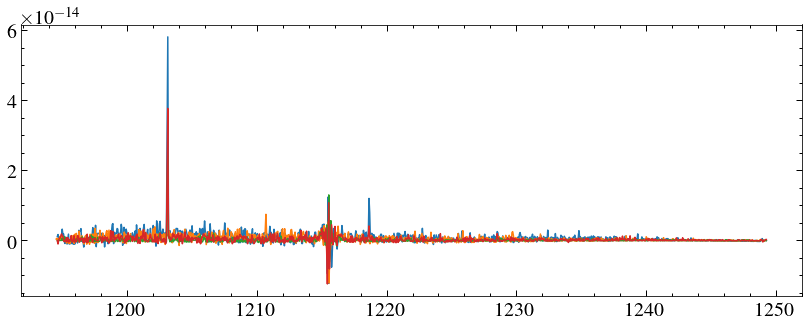

In [81]:
for s in mmG140M:
    data = fits.getdata(s,1)[0] 
    plt.plot(data['WAVELENGTH'], data['FLUX'])
data['WAVELENGTH'][0],data['WAVELENGTH'][-1],

yay same settings! 

In [85]:
aG140M = []
[aG140M.append(s) for s in mmG140M]
[aG140M.append(path+s) for s in G140M]
aG140M

['/home/david/work/muscles/trappist-1/hst/data/odlm41050_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41040_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41020_recal_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/data/odlm41030_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhsb2010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhs07030_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/od3v01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhs31040_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/oddv01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhs29060_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/od3v01020_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhs33050_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/archival_data/odhsb1020_x1d.fits',
 '/home/david/work/muscles/tr

In [87]:
w = []
fs = []
es = []
dqs = []
for s in aG140M:
    data = fits.getdata(s,1)[0]
    w1, f1, e1, dq1 = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    #for i in range(len(f1)):
     #   if dq[i] != 0:
      #      f1[i], e1[i] = 0., 0.
    w = w1
    fs.append(f1)
    es.append(e1)
    dqs.append(dq1)
   # print(np.median(f1))
w = np.array(w)
fs = np.array(fs)
es = np.array(es)
dqs = np.array(dqs)
dq = np.amax(dqs, axis=0 )

In [88]:
f_mean = np.mean(fs, axis=0)
e_mean = np.std(fs, axis=0)

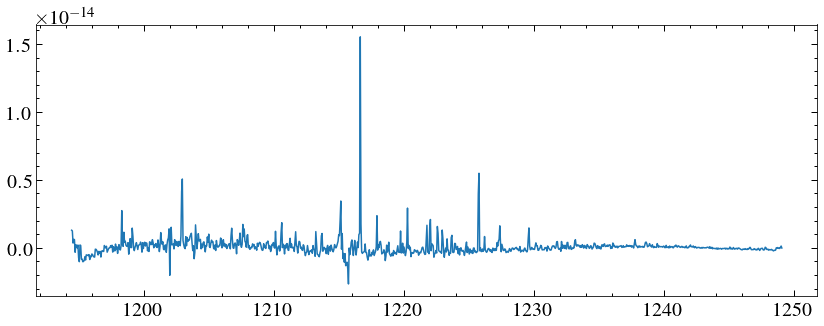

In [89]:
plt.plot(w, f_mean)

In [90]:
data = Table([w*u.AA, f_mean*u.erg/u.cm**2/u.s/u.AA, e_mean*u.erg/u.cm**2/u.s/u.AA, dq], names = ['WAVELENGTH', 'FLUX', 'ERROR','DQ'] )
ascii.write(data, 'TRAPPIST-1_G140M_mean.ecsv', delimiter=',', format='ecsv')

In [92]:
expt = []
for s in aG140M:
    expt.append(fits.getheader(s,0)['TEXPTIME'])
print(expt)
print(sum(expt))

[2710.192625, 2710.183125, 2709.999936330132, 2710.18975, 1799.910375, 2000.176875, 1953.177375, 2000.177125, 1945.12225, 2000.1925, 2234.18125, 2200.178, 2100.0285, 2200.17425, 2200.173125, 2100.183375, 2000.0825, 2200.16975, 2000.188375, 2100.135375, 1800.065875, 2200.062, 1953.12875, 2100.142, 1700.129, 2000.186, 2100.196125, 1945.048, 2100.129, 1700.00775, 2100.1985, 1888.180625, 2000.19325, 2000.184625, 2100.143125, 2200.175, 2000.169, 2000.183, 2100.152625, 1700.189, 2100.197875, 2000.147125, 2000.186625, 1700.09975, 2100.141125, 2100.157, 2000.19275, 2000.1405, 2200.186125, 2000.171, 2000.19625, 2100.18, 2000.176, 2100.175125, 2000.191875, 1888.0715, 2100.18125, 1700.081125, 2000.17075, 2000.16325, 2100.17075, 2100.194625, 2200.19475, 2100.17425, 2000.165375, 1888.0845, 1888.091625, 2200.192, 1900.164875, 2100.18125, 1900.090625, 2000.192, 2000.189875, 2100.18175, 2100.1225, 2200.170125, 2000.172375, 2200.182625, 2200.152125, 1800.161875, 1800.0685, 2200.1965]
168634.38156133008

In [94]:
sum(expt)/(3600.*24.)

1.9517868236265057

In [95]:
lspec = Table.read('TRAPPIST-1_G140L_coadd.ecsv')
lspec['WAVELENGTH'][0], lspec['WAVELENGTH'][-1] 

(1119.4229345994204, 1716.4712259821163)

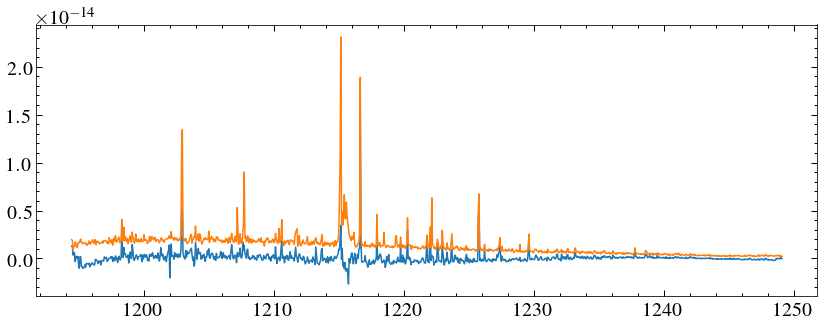

In [97]:
plt.plot(w, f_mean)
plt.plot(w, e_mean)

Openish question- is that continuum significant?

(-1e-15, 3e-15)

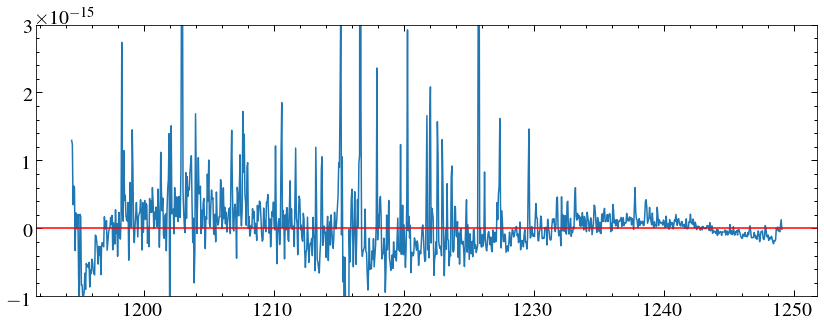

In [100]:
plt.plot(w, f_mean)
plt.axhline(0,c='r')
plt.ylim(-0.1e-14, 0.3e-14)

Nope.